### Importación de datos



In [278]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [327]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format

#1. Análisis de facturación



In [328]:
# Mencionamos un diccionario de las las tiendas indicandoles una llave y valor.
tiendas= {'tienda': tienda,'tienda2': tienda2,'tienda3': tienda3,'tienda4': tienda4}


=== Ingresos Totales por Tienda ===


,Tienda,Ingreso Total (COP)
0,tienda,"1,150,880,400"
1,tienda2,"1,116,343,500"
2,tienda3,"1,098,019,600"
3,tienda4,"1,038,375,700"


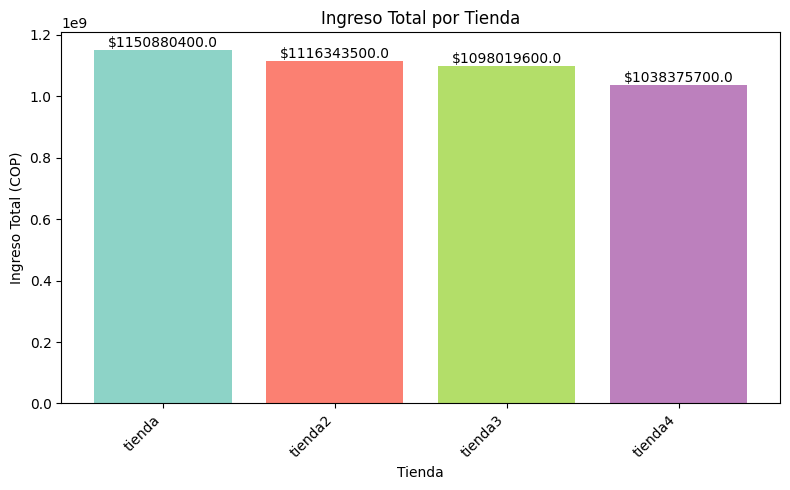

In [342]:
# Crea un diccionario llamado ingresos, que guarda el ingreso total por tienda
ingresos = {nombre: sum(df['Precio']) for nombre, df in tiendas.items()}

#Crear un DataFrame a partir del diccionario ingresos, donde cada fila represente una tienda y su ingreso total.
ingresos_df = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingreso Total (COP)'])

# Imprime el título y muestra el DataFrame en formato de tabla (útil en Jupyter/Colab)
print("\n=== Ingresos Totales por Tienda ===")
display(ingresos_df)

# Define el tamaño de la figura del gráfico de barras
plt.figure(figsize=(8,5))

# Define los colores para las barras usando la paleta 'Set3' de Matplotlib
colores = mpl.colormaps['Set3']
colores_barra = [colores(i/len(nombres)) for i in range(len(nombres))]

# Crea el gráfico de barras con los ingresos por tienda y los colores definidos
bars = plt.bar(ingresos_df['Tienda'], ingresos_df['Ingreso Total (COP)'], color = colores_barra)

# Agrega título y etiquetas a los ejes
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total (COP)')
plt.xticks(rotation=45,ha='right')

# Ajusta el diseño para evitar cortes
plt.tight_layout()

# Añade etiquetas de texto con los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height}',
        ha='center',
        va='bottom'
        )

# Muestra el gráfico
plt.show()

# 2. Ventas por categoría

In [330]:
ventas_categoria = {}
for nombre, df in tiendas.items():
    conteo = df['Categoría del Producto'].value_counts()
    ventas_categoria[nombre] = conteo


=== Ventas por Categoría por Tienda ===


,tienda,tienda2,tienda3,tienda4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


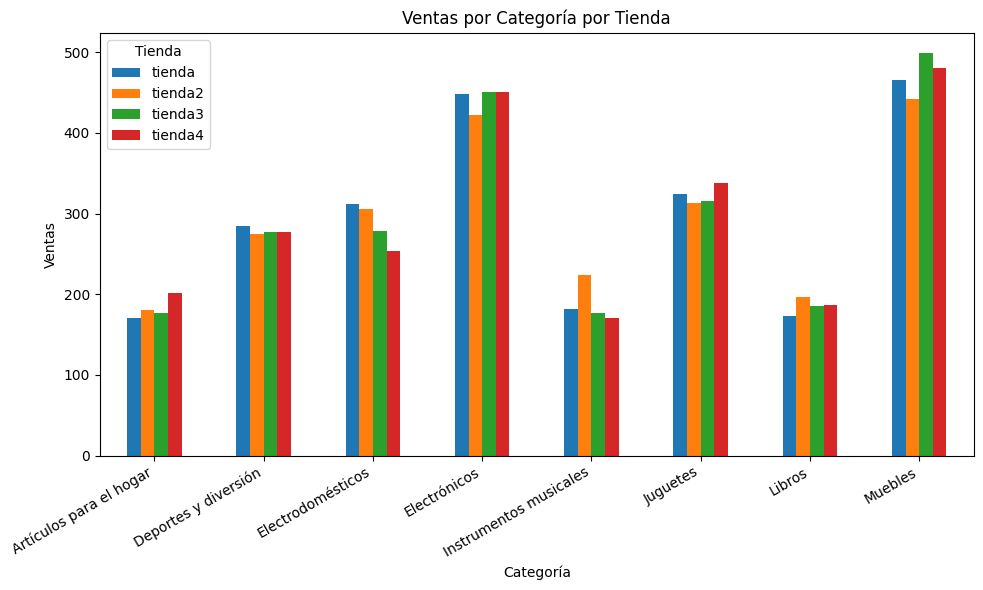

In [332]:
# Crea un diccionario con el conteo de productos por categoría en cada tienda
ventas_cat = {nombre: df['Categoría del Producto'].value_counts() for nombre, df in tiendas.items()}

# Convierte ese diccionario en un DataFrame, llenando valores faltantes con 0 y convirtiendo todo a entero
ventas_cat_df = pd.DataFrame(ventas_cat).fillna(0).astype(int)

# Muestra la tabla de ventas por categoría
print("\n=== Ventas por Categoría por Tienda ===")
display(ventas_cat_df)

# Crea un gráfico de barras agrupadas (una barra por tienda en cada categoría)
ax = ventas_cat_df.plot(kind='bar', figsize=(10,6))

# Título y etiquetas
plt.title('Ventas por Categoría por Tienda')
plt.xlabel('Categoría')
plt.ylabel('Ventas')

# Rota los nombres de las categorías en el eje X para que se vean bien
plt.xticks(rotation=30, ha='right')  # ha='right' alinea los textos hacia la derecha

# Agrega leyenda con título
plt.legend(title='Tienda')

# Ajusta el diseño para evitar que se corte algo
plt.tight_layout()

# Muestra el gráfico
plt.show()


# 3. Calificación promedio de la tienda



=== Calificación Promedio por Tienda ===


,Tienda,Calificación Promedio
0,tienda,4
1,tienda2,4
2,tienda3,4
3,tienda4,4


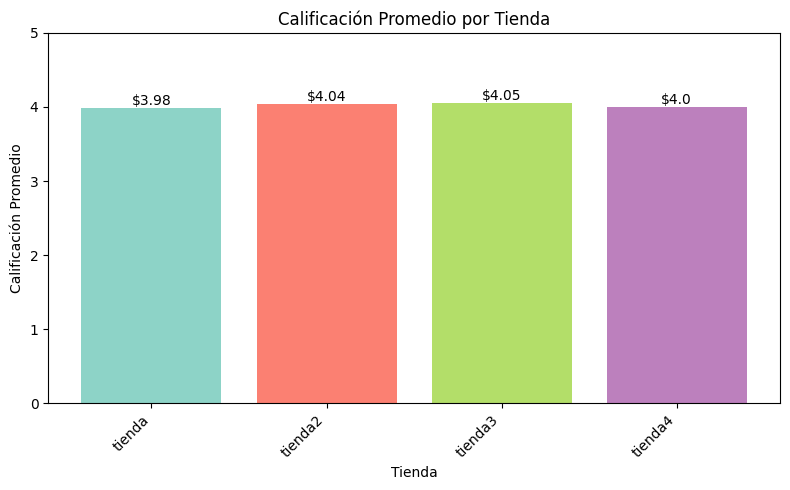

In [343]:
# Calcula el promedio de calificación para cada tienda y lo guarda en un diccionario
calif = {nombre: df['Calificación'].mean() for nombre, df in tiendas.items()}

# Crea un DataFrame a partir del diccionario calif, con columnas 'Tienda' y 'Calificación Promedio'
calif_df = pd.DataFrame(list(calif.items()), columns=['Tienda', 'Calificación Promedio'])

# Redondea la columna de calificaciones promedio a 2 decimales
calif_df['Calificación Promedio'] = calif_df['Calificación Promedio'].round(2)

# Imprime un título y muestra el DataFrame
print("\n=== Calificación Promedio por Tienda ===")
display(calif_df)

# Crea una figura de tamaño 8x5 para el gráfico
plt.figure(figsize=(8,5))

# Define los colores para las barras usando la paleta 'Set3' de Matplotlib
colores = mpl.colormaps['Set3']
colores_barra = [colores(i/len(nombres)) for i in range(len(nombres))]

# Crea el gráfico de barras con los nombres de tiendas y sus calificaciones promedio, usando los colores definidos
bars = plt.bar(calif_df['Tienda'], calif_df['Calificación Promedio'], color=colores_barra)

# Establece el título del gráfico
plt.title('Calificación Promedio por Tienda')

# Etiqueta del eje X
plt.xlabel('Tienda')

# Etiqueta del eje Y
plt.ylabel('Calificación Promedio')

# Define el rango del eje Y de 0 a 5
plt.ylim(0,5)

# Rota los nombres de las tiendas en el eje X 45 grados
plt.xticks(rotation=45, ha='right')

# Ajusta el diseño para que no se corte ningún elemento del gráfico
plt.tight_layout()

# Agrega etiquetas de texto encima de cada barra con el valor correspondiente
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height}',
        ha='center',
        va='bottom'
        )

# Muestra el gráfico
plt.show()

# 4. Productos más y menos vendidos


=== Top 5 Productos más vendidos por Tienda ===

tienda


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56


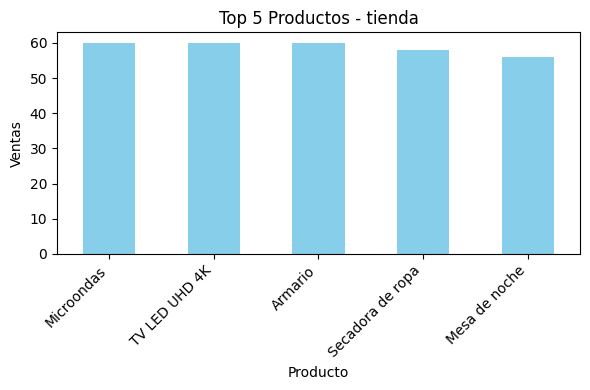


tienda2


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58


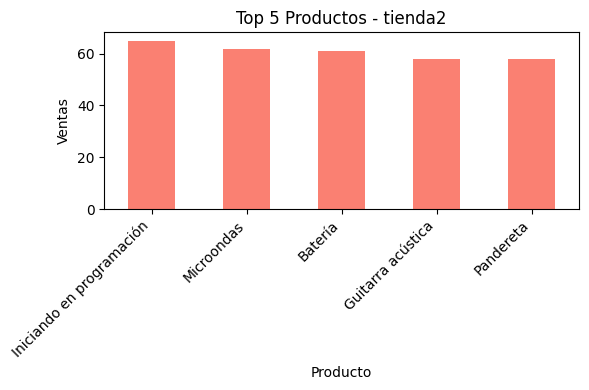


tienda3


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


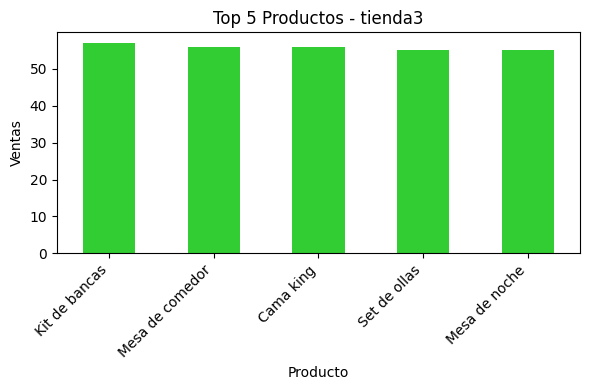


tienda4


,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55


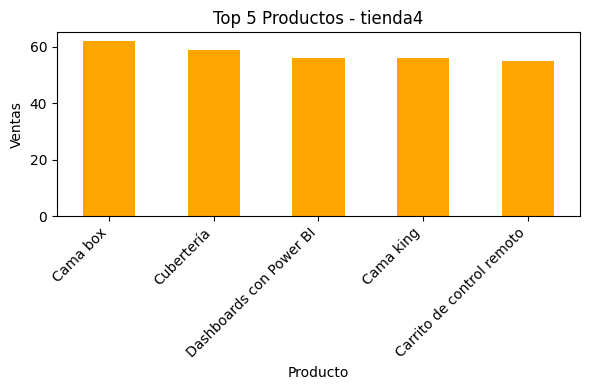

In [348]:
# Importamos la librería para generar gráficos
import matplotlib.pyplot as plt

# Mensaje informativo en consola
print("\n=== Top 5 Productos más vendidos por Tienda ===")

# Diccionario para almacenar el top 5 por tienda
top5 = {}

# Lista de colores para los gráficos (uno diferente por tienda)
colores = ['skyblue', 'salmon', 'limegreen', 'orange', 'mediumpurple', 'gold', 'tomato', 'turquoise']

# Iteramos por cada tienda y su DataFrame asociado
for i, (nombre, df) in enumerate(tiendas.items()):
    # Obtenemos el top 5 productos más vendidos usando value_counts()
    top5[nombre] = df['Producto'].value_counts().head(5)

    # Mostramos el nombre de la tienda y la tabla del top 5
    print(f"\n{nombre}")
    display(top5[nombre])

    # Creamos una figura para el gráfico de barras
    plt.figure(figsize=(6,4))

    # Generamos el gráfico con un color distinto para cada tienda
    top5[nombre].plot(kind='bar', color=colores[i % len(colores)])  # % permite reciclar colores si hay más tiendas

    # Añadimos título y etiquetas
    plt.title(f'Top 5 Productos - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Ventas')

    # Rotamos las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=45, ha='right')

    # Ajustamos el diseño para evitar que se recorten elementos
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()


=== Top 5 Productos menos vendidos por Tienda ===

tienda


,count
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


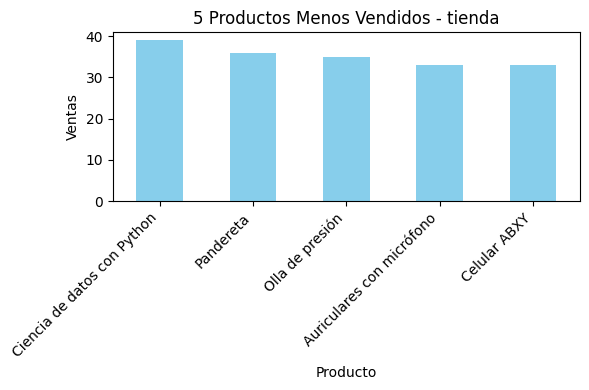


tienda2


,count
Producto,
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


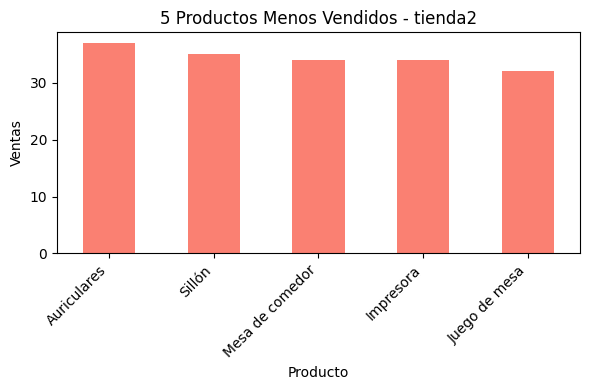


tienda3


,count
Producto,
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


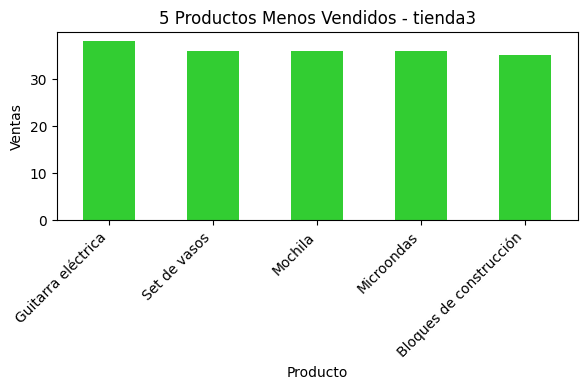


tienda4


,count
Producto,
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


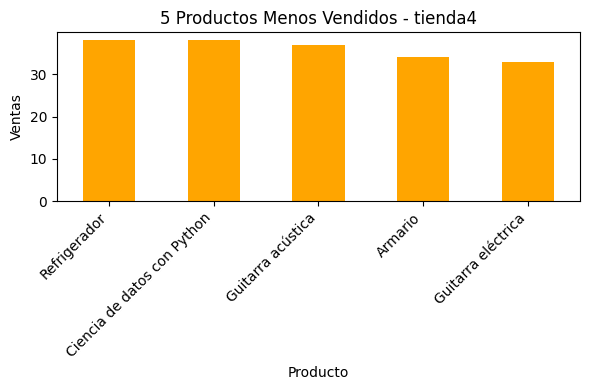

In [349]:
# Mensaje informativo en consola
print("\n=== Top 5 Productos menos vendidos por Tienda ===")

# Diccionario para almacenar el bottom 5 por tienda
bottom5 = {}

# Lista de colores para los gráficos (uno diferente por tienda)
colores = ['skyblue', 'salmon', 'limegreen', 'orange', 'mediumpurple', 'gold', 'tomato', 'turquoise']

# Iteramos por cada tienda y su DataFrame asociado
for i, (nombre, df) in enumerate(tiendas.items()):
    # Obtenemos los 5 productos menos vendidos usando value_counts() y tail()
    bottom5[nombre] = df['Producto'].value_counts().tail(5)

    # Mostramos el nombre de la tienda y la tabla del bottom 5
    print(f"\n{nombre}")
    display(bottom5[nombre])

    # Creamos una figura para el gráfico de barras
    plt.figure(figsize=(6,4))

    # Generamos el gráfico con un color distinto para cada tienda
    bottom5[nombre].plot(kind='bar', color=colores[i % len(colores)])  # % permite reciclar colores si hay más tiendas

    # Añadimos título y etiquetas
    plt.title(f'5 Productos Menos Vendidos - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Ventas')

    # Rotamos las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=45, ha='right')

    # Ajustamos el diseño para evitar que se recorten elementos
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()


# 5. Envío promedio por tienda


=== Comparación de Costo de Envío Promedio entre Tiendas ===


,Tienda,Costo Envío Promedio (COP)
0,tienda,26018.61
1,tienda2,25216.24
2,tienda3,24805.68
3,tienda4,23459.46


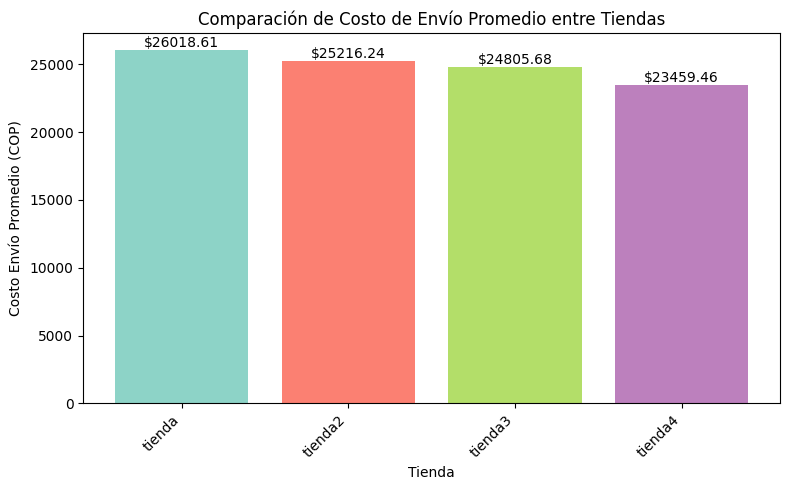

In [358]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Cálculo del costo de envío promedio para cada tienda
envio_promedio = {nombre: df['Costo de envío'].mean() for nombre, df in tiendas.items()}
envio_prom_df = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Costo Envío Promedio (COP)'])

# Formatear los valores en la columna 'Costo Envío Promedio (COP)' para que se muestren con dos decimales
envio_prom_df['Costo Envío Promedio (COP)'] = envio_prom_df['Costo Envío Promedio (COP)'].apply(lambda x: f'{x:.2f}')

# Mostrar la tabla con los valores formateados
print("\n=== Comparación de Costo de Envío Promedio entre Tiendas ===")
display(envio_prom_df)

# Crear el gráfico de barras
plt.figure(figsize=(8,5))

# Definir los colores para las barras usando la paleta 'Set3' de Matplotlib
colores = mpl.colormaps['Set3']
nombres = envio_prom_df['Tienda']
colores_barra = [colores(i / len(nombres)) for i in range(len(nombres))]

# Crear las barras
bars = plt.bar(envio_prom_df['Tienda'], envio_prom_df['Costo Envío Promedio (COP)'].astype(float), color=colores_barra)

# Añadir título y etiquetas
plt.title('Comparación de Costo de Envío Promedio entre Tiendas')
plt.xlabel('Tienda')
plt.ylabel('Costo Envío Promedio (COP)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir los valores de costo de envío encima de cada barra, con formato a dos decimales
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'${height:.2f}',  # Formato con dos decimales
        ha='center',
        va='bottom'
    )

# Mostrar el gráfico
plt.show()

# 6. Exploración Geográfica de Ventas (Opcional)


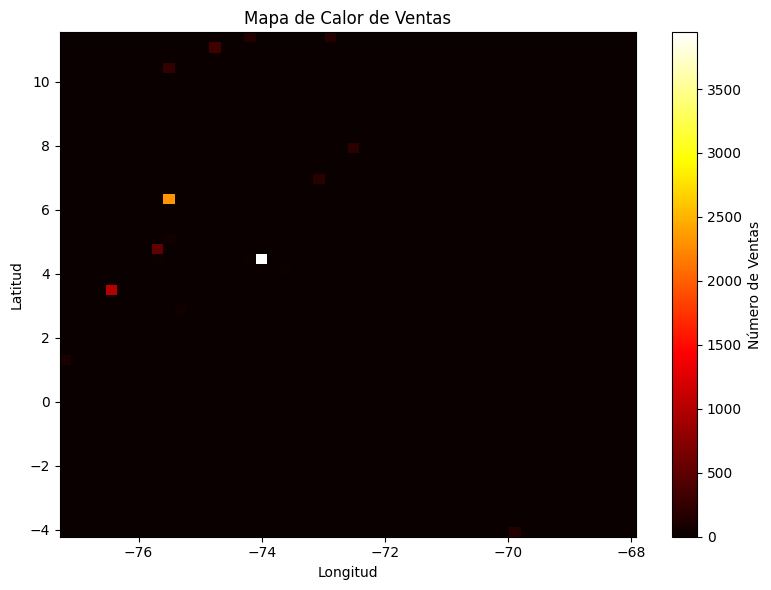

In [360]:

df_geo = pd.concat([df.assign(Tienda=nombre) for nombre, df in tiendas.items()], ignore_index=True)

plt.figure(figsize=(8,6))
plt.hist2d(df_geo['lon'], df_geo['lat'], bins=(50,50), cmap='hot')
plt.title('Mapa de Calor de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Número de Ventas')
plt.tight_layout()
plt.show()